<a href="https://colab.research.google.com/github/Auxilus08/DHV/blob/main/Practical_3B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
latency =  [30, 32, 31, 29, 150, 28, 27, 33, 34, 29, 31, 35, 200, 29, 30, 28, 33]

In [8]:
import numpy as np
from scipy import stats

In [12]:
mean_val = np.mean(latency)
mode_val = stats.mode(latency)[0]
median_val = np.median(latency)

print("Mean: ", mean_val)
print("Mode: ", mode_val)
print("Median: ", median_val)

Mean:  47.588235294117645
Mode:  29
Median:  31.0


In [10]:
skewness = stats.skew(latency)
print("Skewness: ", skewness)

kurtosis = stats.kurtosis(latency)
print("Kurtosis: ", kurtosis)

Skewness:  2.5128078704103576
Kurtosis:  4.613368274768248


In [13]:
# modified Z score for outliers

median = np.median(latency)
mad = np.median([np.abs(latency - median)])
modified_z_scores = [0.6745 * (x - median) / mad for x in latency]
outliers_mz = [x for x, mz in zip(latency, modified_z_scores) if abs(mz) > 3.5]

In [17]:
# Tukey's fences

Q1, Q3 = np.percentile(latency, [25, 75])
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
outliers_tukey = [x for x in latency if x < lower_fence or x > upper_fence]


print(f"Mean: {mean_val}, Median: {median_val}, Mode: {mode_val}")
print(f"Skewness: {skewness:.3f}, Kurtosis: {kurtosis:.3f}")
print(f"Outliers (Modified Z-Score): {outliers_mz}")
print(f"Outliers (Tukey's Fences): {outliers_tukey}")

Mean: 47.588235294117645, Median: 31.0, Mode: 29
Skewness: 2.513, Kurtosis: 4.613
Outliers (Modified Z-Score): [150, 200]
Outliers (Tukey's Fences): [150, 200]


Measures of Variation and ECDF(Emprical Cumulative Distribution Function) on Grouped Data with Unequal Class Widths

In [ ]:
import matplotlib.pyplot as plt

In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

class_intervals = [(10, 19), (20,34), (35, 49), (50, 70)]
frequencies = [4, 7, 6, 3]

midpoints = [(low + high) / 2 for low, high in class_intervals]
n = sum(frequencies)

mean_grouped = sum(f * x for f, x in zip(frequencies, midpoints)) / n
variance = sum(f * (x - mean_grouped)**2 for f, x in zip(frequencies, midpoints)) / n
cv = (np.sqrt(variance) / mean_grouped) * 100


cum_freq = np.cumsum(frequencies)


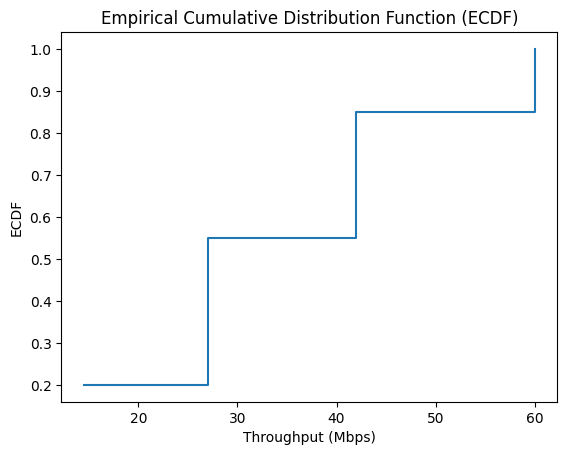

In [24]:
ecdf_x = []
ecdf_y = []

for i, f in enumerate(frequencies):
  ecdf_x.append(midpoints[i])
  ecdf_y.append(cum_freq[i]/n)

plt.step(ecdf_x, ecdf_y, where = 'post')
plt.xlabel("Throughput (Mbps)")
plt.ylabel("ECDF")
plt.title("Empirical Cumulative Distribution Function (ECDF)")
plt.show()

In [27]:
print(f"Mean : {mean_grouped}, variance : {variance:.3f}, CoV : {cv:.3f}%")

Mean : 33.95, variance : 213.797, CoV : 43.069%


Multivariate Z-score and Anomaly Detection

In [28]:
np.random.seed(42)


cpu_usage = np.random.normal(loc=50, scale=15, size=45)
memory_usage = np.random.normal(loc=60, scale=10, size=45)


outlier_cpu = np.array([95, 10, 80, 5, 90])
outlier_memory = np.array([10, 95, 85, 15, 90])

data = np.vstack((np.concatenate((cpu_usage, outlier_cpu)), np.concatenate((memory_usage, outlier_memory)))).T

In [29]:
print(data[:5])

[[57.4507123  52.80155792]
 [47.92603548 55.39361229]
 [59.71532807 70.57122226]
 [72.84544785 63.4361829 ]
 [46.48769938 42.36959845]]


In [30]:
mean_vector = np.mean(data, axis=0)
cov_matrix = np.cov(data.T)

print("Mean Vector:", mean_vector)
print("Covariance Matrix:\n", cov_matrix)

Mean Vector: [47.68072621 60.06763497]
Covariance Matrix:
 [[345.3505859  -14.43958896]
 [-14.43958896 227.02261971]]


In [31]:
from scipy.spatial.distance import mahalanobis

inv_cov_matrix = np.linalg.inv(cov_matrix)

mahalanobis_distances = [mahalanobis(x, mean_vector, inv_cov_matrix) for x in data]

In [32]:
threshold = 5.99  # Chi-squared critical value for 95% confidence and 2 degrees of freedom

anomalies = [data[i] for i, dist in enumerate(mahalanobis_distances) if dist > threshold]

print("Identified Anomalies:")
for anomaly in anomalies:
  print(anomaly)

Identified Anomalies:


No anomalies found with the current threshold.


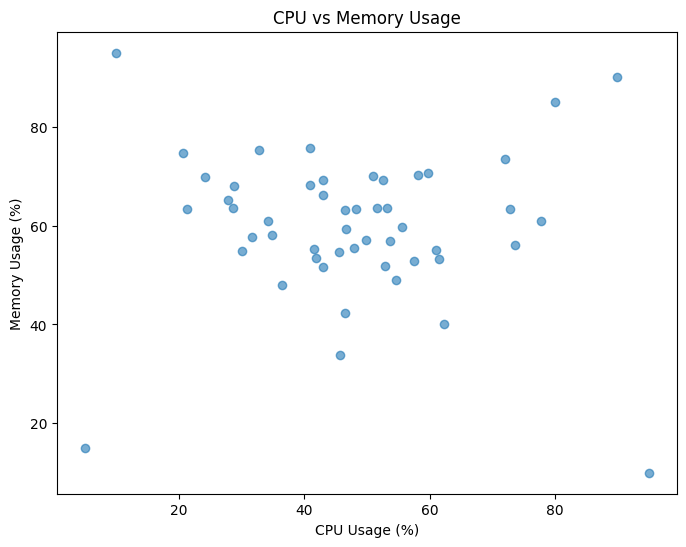

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], label='Normal Data', alpha=0.6)
plt.xlabel('CPU Usage (%)')
plt.ylabel('Memory Usage (%)')
plt.title('CPU vs Memory Usage')

if anomalies: # Check if the anomalies list is not empty
    anomalies_np = np.array(anomalies)
    plt.scatter(anomalies_np[:, 0], anomalies_np[:, 1], color='red', label='Anomalies')
    plt.legend()
else:
    print("No anomalies found with the current threshold.")

plt.show()